# Clustering of Kepler Exoplanets

Matthew Karnes
 
September 2020

This project was completed on its own as an effort to practice and refine necessary skills.

Kepler was a mission launched by NASA in 2009 to attempt to locate and discover exoplanets within the Milky Way through use of the Kepler
Space Telescope.  The telescope was a space craft that orbited Earth and would scan the depths of space for transit events, which is where something passes in front of a distant star and interrupts the light visible.  These transit events are then flagged and studied to determine whether or not the event was caused by an exoplanet or by a false positive, which could be another non-planetary mass or a mistake in the sensors. 

The data used here can be found at https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS&constraint=default_flag=1. This data is a collection of all current confirmed exoplanets and contains the various features that describe the exoplanets.  The purpose of this project is to attempt to cluster the exoplanets into the four categories of exoplanets as defined by NASA (Gas Giant, Neptune-like, Super Earth, and Terrestrial). This will be done using only the mass and radius of each planet.


# Implementation

I begin by importing the necessary models.  I will be using Pandas and Numpy to manipulate and investigate the dataset and Matplotlib and Seaborn to visualize the data.  Model building will be handled by Scikit-Learn and I will use K-Means Clustering for the actual clustering. 

In [3]:
#Import data manipulation tools
import pandas as pd
import numpy as np 

#Import data visualization tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Set pandas to display all columns in the dataset
pd.set_option('display.max_columns', None)

#Imputing and Scaling data
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#Clustering
from sklearn.cluster import KMeans

# Analysis and Feature Selection

The dataset comes with 96 extra lines of information naming all of the various features and as such I specify the header as line 97.

In [4]:
#Load dataset into a usable dataframe and set header to the correct starting point
df = pd.read_csv(r"Confirmed_Exoplanets.csv", header=97)

df.head(5)

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,326.03000,0.32,-0.32,0.0,1.29,0.05,-0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6165.6000,476.7000,-476.7000,0.0,19.40,1.50,-1.50,0.0,Msini,0.231,0.005,-0.005,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,4742.0,100.0,-100.0,0.0,19.00,2.00,-2.00,0.0,2.70,0.30,-0.30,0.0,-0.35,0.09,-0.09,0.0,[Fe/H],2.31,0.10,-0.10,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,1.92380,-1.92380,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
1,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,516.21997,3.20,-3.20,0.0,1.53,0.07,-0.07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4684.8142,794.5750,-794.5750,0.0,14.74,2.50,-2.50,0.0,Msini,0.080,0.030,-0.030,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,4213.0,46.0,-46.0,0.0,29.79,2.84,-2.84,0.0,2.78,0.69,-0.69,0.0,-0.02,NaN,NaN,0.0,[Fe/H],1.93,0.07,-0.07,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,1.97650,-1.97650,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04 16:14:36,2017-03,2018-09-06
2,14 And b,14 And,1,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,Published Confirmed,0,<a refstr=SATO_ET_AL__2008 href=https://ui.ads...,185.84000,0.23,-0.23,0.0,0.83,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1525.5000,NaN,NaN,0.0,4.80,NaN,NaN,0.0,Msini,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=SATO_ET_AL__2008 href=https://ui.ads...,4813.0,20.0,-20.0,0.0,11.00,1.00,-1.00,0.0,2.20,0.10,-0.20,0.0,-0.24,0.03,-0.03,0.0,[Fe/H],2.63,0.07,-0.07,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,23h31m17.80s,352.824150,+39d14m09.01s,39.235837,75.4392,0.71400,-0.71400,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,2014-05-14,2008-12,2014-05-14
3,14 Her b,14 Her,1,1,1,Radial Velocity,2002,W. M. Keck Observatory,Published Confirmed,0,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,1773.40002,2.50,-2.50,0.0,2.93,0.08,-0.08,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1481.0878,47.6745,-47.6745,0.0,4.66,0.15,-0.15,0.0,Msini,0.370,0.000,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,5338.0,25.0,-25.0,0.0,0.93,0.01,-0.01,0.0,0.90,0.04,-0.04,0.0,0.41,NaN,NaN,0.0,[Fe/H],4.45,0.02,-0.02,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,17.9323,0.00730,-0.00730,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351,2018-09-04 16:14:20,2017-03,2018-09-06
4,16 Cyg B b,16 Cyg B,1,3,1,Radial Velocity,1996,Multiple Observatories,Published Confirmed,0,<a refstr=STASSUN_ET_AL_

As can be seen here there are 91 different features detailing what is known about each exoplanet and there are 4306 different entries.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4306 entries, 0 to 4305
Data columns (total 91 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          4306 non-null   object 
 1   hostname         4306 non-null   object 
 2   default_flag     4306 non-null   int64  
 3   sy_snum          4306 non-null   int64  
 4   sy_pnum          4306 non-null   int64  
 5   discoverymethod  4306 non-null   object 
 6   disc_year        4306 non-null   int64  
 7   disc_facility    4306 non-null   object 
 8   soltype          4306 non-null   object 
 9   pl_controv_flag  4306 non-null   int64  
 10  pl_refname       4306 non-null   object 
 11  pl_orbper        4163 non-null   float64
 12  pl_orbpererr1    3986 non-null   float64
 13  pl_orbpererr2    3986 non-null   float64
 14  pl_orbperlim     4163 non-null   float64
 15  pl_orbsmax       2557 non-null   float64
 16  pl_orbsmaxerr1   1750 non-null   float64
 17  pl_orbsmaxerr2

I am going to perform clustering using only the radius and mass of the exoplanets in an attempt to simplify the clustering for best results and for computational time.

In [5]:
features = df[["pl_rade","pl_bmasse"]]

features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4306 entries, 0 to 4305
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pl_rade    3300 non-null   float64
 1   pl_bmasse  1790 non-null   float64
dtypes: float64(2)
memory usage: 67.4 KB


In [28]:
features.head(10)

,pl_rade,pl_bmasse
0,NaN,6165.6000
1,NaN,4684.8142
2,NaN,1525.5000
3,NaN,1481.0878
4,NaN,565.7374
5,NaN,3273.5000
6,NaN,3000.0000
7,NaN,289.2253
8,NaN,632.4600
9,NaN,273.3200


I run into a problem here in that I am missing a large portion of data. About 25% of our masses and almost 60% of radii.  Normally if working with more features I would most likely drop the radii since such a large percentage of the data isn't there but in this case I am not going to do that, as the radii is very important.  Instead I am going to drop the missing values. With this much missing data, imputation will not be accurate so I will continue with what is left after dropping the NaN values.

In [6]:
features_reduced = features.dropna()

In [7]:
features_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 12 to 4292
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pl_rade    800 non-null    float64
 1   pl_bmasse  800 non-null    float64
dtypes: float64(2)
memory usage: 18.8 KB


This leaves us with 800 entries to work with. Results will be less accurate than if I had the full 4306 but I can still try and get a result out of this. Based on the plot below I can see that I have mostly "low" mass exoplanets and a greater range of radii which is consistent with the distributions of the data before I removed the NaN entries, though I seem to have mostly lost radii near 1 to 5 Earth radii, the largest group in the distribution. 

Text(0.5, 1, 'Radius vs Mass of Exoplanets')

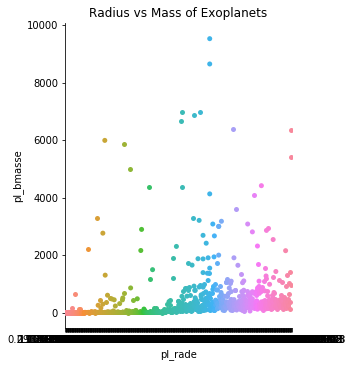

In [78]:
sns.catplot(x="pl_rade",y ="pl_bmasse", data = features_reduced)
plt.title("Radius vs Mass of Exoplanets")

Text(0.5, 1.0, 'Distribution of Mass Feature')

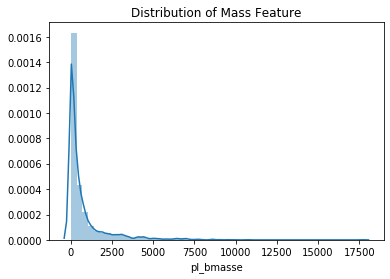

In [15]:
sns.distplot(df["pl_bmasse"])
plt.title("Distribution of Mass Feature")

Text(0.5, 1.0, 'Distribution of Radii Feature')

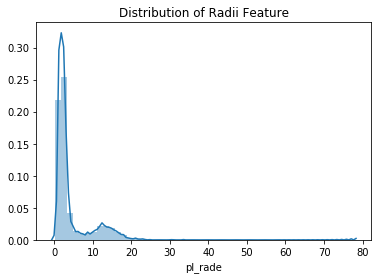

In [16]:
sns.distplot(df["pl_rade"])
plt.title("Distribution of Radii Feature")

I then scale the data so as to account for the different units that the data has.  MinMaxScaling does not change the distribution of the data but brings the distances between the data to be more consistent.

In [52]:
#Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

#Fit on the training data
scaler.fit(features_reduced)

#Transform both the training and testing data
scaled_features = scaler.transform(features_reduced)


Here I will be implementing the Elbow Curve method for finding the amount of clusters that will best fit our data. I fit a number of clusters, in this case 20, and find the point at which adding new clusters begins to give diminishing returns on how well the model fits the data. From the graph below I can see that diminishing returns begin at about 4 clusters which is wonderful as NASA accounts for 4 types of exoplanets. As such I will move forward with 4 clusters for the model. 

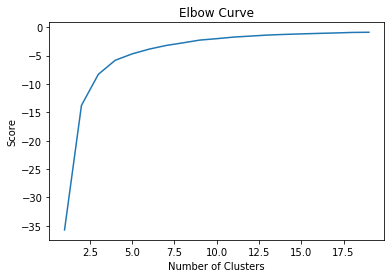

In [55]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(scaled_features).score(scaled_features) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

I will now fit our model to the data.  I  run 500 iterations and attempt to fit 4 clusters to the data.

In [73]:
km = KMeans(
    n_clusters=4, init="k-means++",
    max_iter=500, 
   random_state=42
)
km.fit_predict(scaled_features)

# print the sum of distances from all examples to the center of the cluster
print("within-cluster sum-of-squares (inertia) of the model is:", km.inertia_)

within-cluster sum-of-squares (inertia) of the model is: 5.824556917604445


Now to determine the cluster centers and graph the clusters over the data.

In [74]:
km.cluster_centers_

array([[0.49898021, 0.0508859 ],
       [0.07550329, 0.01031621],
       [0.34686799, 0.04329279],
       [0.37789955, 0.49486466]])

Text(0.5, 1.0, 'Visualization of clustered data')

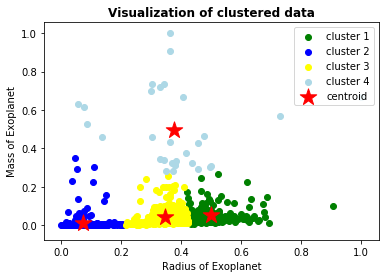

In [75]:
centroids = km.cluster_centers_
# Plot the clustered data

plt.scatter(scaled_features[km.labels_ == 0, 0], scaled_features[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(scaled_features[km.labels_ == 1, 0], scaled_features[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(scaled_features[km.labels_ == 2, 0], scaled_features[km.labels_ == 2, 1],
            c='yellow', label='cluster 3')
plt.scatter(scaled_features[km.labels_ == 3, 0], scaled_features[km.labels_ == 3, 1],
            c='lightblue', label='cluster 4')          
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlabel('Radius of Exoplanet')
plt.ylabel('Mass of Exoplanet')
plt.title('Visualization of clustered data', fontweight='bold')

As can be seen here  clusters were applied to the data with the variation in the clusters mostly coming from the radii. 3 of the 4 clusters appear to be entirely based on the radii with the clusters each having a range of about 0.2 (remembering that we scaled the radii and masses from 0 to 1).  The 4th cluster is the outlier in that it spans the entire range of radii but has much higher mass.  This appears to be generally in line with the classifications from NASA, with Terrestrial, Super Earths, and Neptune-like planets increasing in radius and mass in that order, which can be seen above, and with Gas Giants having generally high mass and a large range of radii.

# Conclusion

- A clustering model can be made that seperates the exoplanets found by the Kepler Mission into the 4 categories as defined by NASA.

- The clustering can be done even with a majority of the data being missing.

- It is now possible to extract specific entries and assess whether or not the model was accurate in its clustering.
